In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy
sns.set_style('white')
sns.set_context('paper')

In [2]:
df = pd.read_csv('../validation/aggregate_results/topo_metric_error_analysis.csv')
df.dropna(inplace=True)
for c in df.columns:
    if 'Unnamed' in c:
        del df[c]
df.head()

,UTM_E,UTM_N,MagnaProbe Depth [m],geometry,Raster Value [m],Probe-Raster Delta [m],Raster Value Corrected [m],Year,Study Area,Error [m],aspect,slope,Aspect Label
0,409625.309723,7.617305e+06,0.7659,POINT (409625.3097232447 7617304.648330711),0.559204,0.206696,0.809204,2018,CLPX,0.206696,38.632992,1.749862,NE
1,409625.303271,7.617304e+06,0.7942,POINT (409625.3032707528 7617304.470029737),0.559204,0.234996,0.809204,2018,CLPX,0.234996,38.632992,1.749862,NE
2,409625.507953,7.617303e+06,0.7609,POINT (409625.5079526542 7617302.599168913),0.541809,0.219091,0.791809,2018,CLPX,0.219091,74.649864,1.479253,NE
3,409626.447111,7.617302e+06,0.8480,POINT (409626.4471109976 7617302.375489335),0.539490,0.308510,0.789490,2018,CLPX,0.308510,88.776245,1.309718,NE
4,409624.979279,7.617301e+06,0.0006,POINT (409624.9792791235 7617301.134233069),0.568726,-0.568126,0.818726,2018,CLPX,-0.568126,80.057343,1.953727,NE


In [4]:
df['Error [m]'] = df['Probe-Raster Delta [m]'].astype('float32')

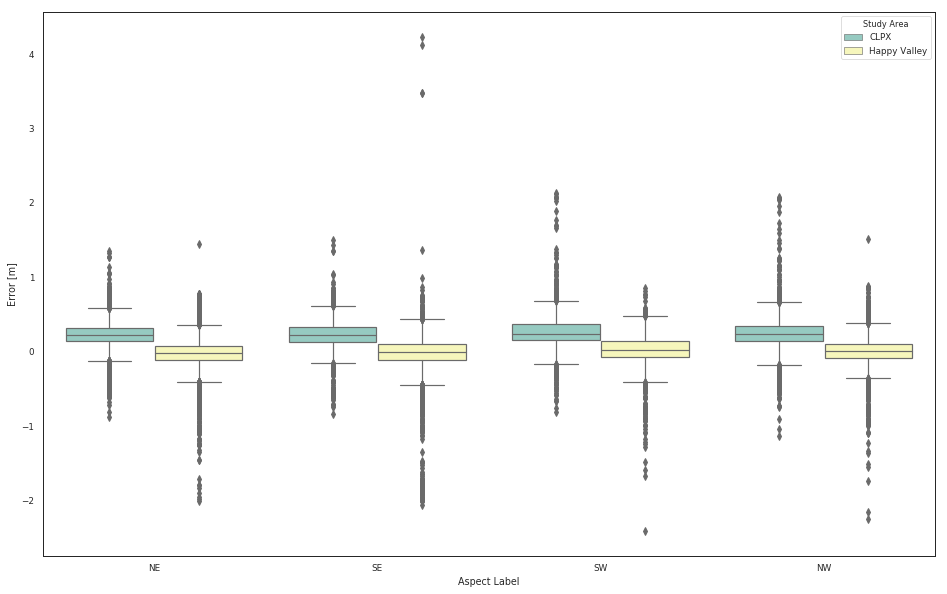

In [7]:
plt.figure(figsize=(16,10))
ax = sns.boxplot(x="Aspect Label", y="Error [m]", hue="Study Area",
                 data=df, palette="Set3")